In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
data = pd.read_csv(r'C:\Users\Jubin\Desktop\RP18\Datasets\intel\interpolated\injected_mixed\mote=4_sensortype=temperature_faulttype=mixed.csv')

In [81]:
temperatures = data['temperature']
timestamps = data['timestamp']
faults = data['has_fault_type']

In [82]:
def temperature_to_grayscale(temperature):
    min_temp = min(temperatures)
    max_temp = max(temperatures)
    grayscale_value = int((temperature - min_temp) / (max_temp - min_temp) * 255)
    return grayscale_value

In [83]:
grayscale_values = [temperature_to_grayscale(temp) for temp in temperatures]
grayscale_values = np.array(grayscale_values)

In [84]:
temperature_array = np.array(temperatures)

In [85]:
num_columns = 20160
num_rows = 1

In [86]:
image_representation_1 = temperature_array.reshape(num_rows, num_columns)
image_representation_2 = grayscale_values.reshape(num_rows, num_columns)

Text(0, 0.5, 'Temperature Values')

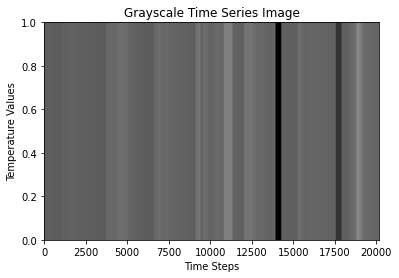

In [87]:
plt.imshow(image_representation_1, cmap='gray', aspect='auto', extent=[0, num_columns, 0, num_rows])
plt.title('Grayscale Time Series Image')
plt.xlabel('Time Steps')
plt.ylabel('Temperature Values')

Text(0, 0.5, 'Temperature Values')

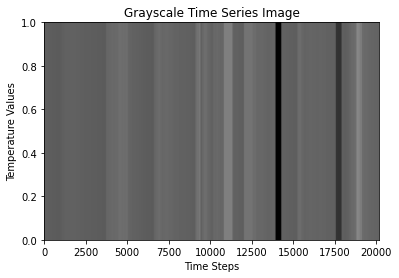

In [88]:
plt.imshow(image_representation_2, cmap='gray', aspect='auto', extent=[0, num_columns, 0, num_rows])
plt.title('Grayscale Time Series Image')
plt.xlabel('Time Steps')
plt.ylabel('Temperature Values')

In [89]:
window_size = 12

def create_windows_and_labels(data, labels, window_size):
    num_windows = len(data) - window_size + 1
    windowed_data = [data[i:i + window_size] for i in range(num_windows)]
    windowed_labels = labels[window_size - 1:]  # Shift labels by window_size - 1
    return windowed_data, windowed_labels

In [90]:
windowed_data, windowed_labels = create_windows_and_labels(grayscale_values, faults, window_size)
windowed_data = np.array(windowed_data)
windowed_labels = np.array(windowed_labels)

In [91]:
from PIL import Image

In [92]:
windowed_images = []

for x in windowed_data:
    windowed_images.append(Image.fromarray(x))

windowed_images = np.array(windowed_images)


c:\Users\Jubin\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  
c:\Users\Jubin\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [93]:
data_df = pd.DataFrame({'Temperature': windowed_images, 'Faults': windowed_labels})

In [94]:
data_df['Faults'].unique()

array([0, 1, 4, 8, 2], dtype=int64)

In [95]:
import pandas as pd

In [97]:
data_df.to_csv(r'C:\Users\Jubin\Desktop\RP18\Datasets\ImageDatasets\GeneticImages.csv')